In [96]:
import os
#import library yang dibutuhkan dalam pengolahan citra
import pandas
import numpy 
import cv2 as opcv
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as pyplot
import seaborn as sns


#import library yang dibutuhkan dalam evaluasi klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#import library yang dibutuhkan dalam algoritma klasifikasi
from sklearn.ensemble import RandomForestClassifier

In [97]:
#fungsi untuk preprocessing citra
def praproses(x):
    #aplikasi gaussian blur untukn smoothing citra dengan filter 3x3
    gaussian = opcv.GaussianBlur(x, (3, 3), 0)
    #return hasil citra
    return gaussian

def img_his(source):
    # proses ekstrasi ciri menggunakan lbp
    # lbp_array = local_binary_pattern(source, n_points, radius, METHOD)
    img_array, bins = numpy.histogram(source.ravel(), 256, [0,256])
    # img_array = img_array/255.
    img_array = numpy.transpose(img_array[0:18, numpy.newaxis])
    
    # lbp_his = lbp_array.flatten()
    img_his = (img_array.flatten())
    print(img_his)

    return img_his

In [98]:
# #inisialisasi local binary pattern
# radius = 3
# n_points = 8 * radius
# METHOD = 'uniform'
# pyplot.rcParams['font.size'] = 9

path = "D:\\Download\\Compressed\\dataset_bola\\dataset_bola\\"

In [99]:
dataset = []
response = []

j=0
for folder in os.listdir(path):
    # memnabaca setiap yang ada dalam 
    for filename in os.listdir(path+folder):
        img = opcv.imread(path+folder+"\\"+filename,0)

        pre_img = praproses(img)
        his_img = img_his(pre_img)
        his_img = his_img/255.0

        dataset.append(his_img)
        response.append(j)
    j+=1

# print(numpy.shape(dataset))
# print(numpy.shape(response))

[  0   0   0   0   0   0   0   0   0   0   0   1 134  28  18  25  38  79]
[28329  1916   100    30    60   161    59    19    15    16    18    15
    22    16    12    13    20    14]
[ 21 194  93  45  36  27  37  24  30  24  28  32  30  22  28  38  44  41]
[  0   0   0   0   0   0   0   0   2 112  29  17   9  20   8  10  18  46]
[10815  2113   211    94    84    60    51    53    44    49    35    36
    36    41    43    51    50    33]
[17782  1989   206   101    85    85    49    70    63    90    62    58
    36    36    38    32    40    39]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[18091  2023   144    51   377   128   105   103   106   104   108    90
   101    88    93   105    99    74]
[9319 1654   96   38   24   30   49   31   29   28   34   19   21   14
   16   17   21   18]
[25631  2294   447   214   962  1779  2520   530    35    40    58    52
    39    37    37    22    32    25]
[18560  3489  1412   971   748   656   574   504   496   498   446   422
   411   398   377 

In [100]:
# hasil= []
# for i in range(100):
#     train_list, test_list, train_res, test_res = train_test_split(dataset, response, test_size=0.2, random_state=i)
    
#     rforest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=8)
#     rforest.fit(train_list, train_res)
#     rforest_predict = rforest.predict(test_list)

#     rforest_acc = accuracy_score(test_res, rforest_predict)
#     # print(rforest_acc*100)
#     hasil.append(rforest_acc)

# # hasil = numpy.array(hasil).astype(numpy.float32)
# print(max(hasil), hasil.index(max(hasil)))

In [101]:
train_list, test_list, train_res, test_res = train_test_split(dataset, response, test_size=0.2, random_state=5)


In [102]:
hasil = []
for i in range(100):
    rforest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=i)
    rforest.fit(train_list, train_res)
    rforest_predict = rforest.predict(test_list)

    rforest_acc = accuracy_score(test_res, rforest_predict)
    hasil.append(rforest_acc*100)

# print(max(hasil), hasil.index(max(hasil)))
# df = pandas.DataFrame(hasil)
# df.to_csv("rf_non.csv")



In [103]:
rforest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=8)
rforest.fit(train_list, train_res)
rforest_predict = rforest.predict(test_list)

rforest_acc = accuracy_score(test_res, rforest_predict)
print(rforest_acc*100)
# print(test_res)
# print(rforest_predict)

80.0


In [109]:
print('------------------------ confusion matrix  ------------------------------')
label=[0,1,2]
label = numpy.array(label)
cf_matrix=confusion_matrix(test_res, rforest_predict, labels=label)
print(cf_matrix)
print('--------------------- classification report  ----------------------------')
print(classification_report(test_res, rforest_predict))

------------------------ confusion matrix  ------------------------------
[[ 5  3  0]
 [ 1  9  1]
 [ 0  1 10]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.69      0.82      0.75        11
           2       0.91      0.91      0.91        11

    accuracy                           0.80        30
   macro avg       0.81      0.78      0.79        30
weighted avg       0.81      0.80      0.80        30



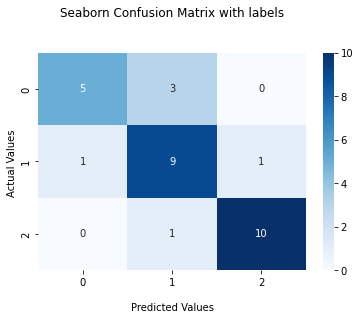

In [110]:

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2])
ax.yaxis.set_ticklabels([0,1,2])

## Display the visualization of the Confusion Matrix.
pyplot.show()